# DS7333 Case Study 2 - Predicting Hospital Readmittance

Jeremy Dawkins, Jacob Gipson, Triston Hudgins

# Introduction

For this case study, the medical community has provided us a study examining people in and out of hospitals. Many factors can contribute to an individuals reasoning on their admittance into an hospital. As we know hospital costs can be a problem for a patient is constantly being readmitted for their specific ailments. We will want to look at the important factors or issues that a patient can have that allows them to be entered into a hospital. We will also create a model that predict patient readmittance which could be used for not only hospitals but maybe insurances as well. By discovering insight into this dataset we will be able to produce understanding on issue that can hopefully be preventable and be possibly be used by other medical industries. 

# Imputation and EDA

Our team first examined the dataset using basic EDA techniques. We

In [248]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')

#read in the dataset here
data = pd.read_csv(r'C:\Users\The Dawk\OneDrive\Documents\Jeremy Grad School\Quantifying The World\diabetic_data.csv')

#Dataframe we will use for algorithm
dia_df = data.copy()

#Play dataframe to manipulate with
df = data

In [249]:
#We will first examine the entirety of the dataset. We see that it contains 101766 rows/patients, and 50 features. 
df.shape

(101766, 50)

In [250]:
#We will look at the summary statistics as well
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [251]:
#Examine if the information of the data to see overview of null values and datatype. 
df.info()

#Becareful here, from opening up the excel document, we can see that weight, payer code and medical speciality actually has missing values
#this is just listed as a question mark so python is reading them as an object and non-null
#we will examine the dataset. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [252]:
#We will use the object df as a play around dataset without the question mark in the dataset
df.drop(df[df['medical_specialty'] == '?'].index,inplace=True)
df.drop(df[df['payer_code'] == '?'].index,inplace=True)

In [253]:
#We will find the mode for children age ranges here for payer code and medical_specialty
#First is the children ages 0-10, we know they tend to seek pediatrics
print(df.loc[df['age'] == '[0-10)','medical_specialty'].mode()[0])
print(df.loc[df['age'] == '[0-10)','payer_code'].mode()[0])

Pediatrics
BC


In [254]:
#Now we will look at the ages of patients 10-20. We notice we are introduced to gynecology for female patients.
#Male patients do not attend gynecologist, so we will separate them from females. We will also examine payer codes as well.
#Since women may have different payer codes than men since gynecology is involved. 
print('Womens Medical_Specialty:',df.loc[(df['age'] == '[10-20)') & (df['gender'] == 'Female'),'medical_specialty'].mode()[0])
print('Male Medical_Specialty:',df.loc[(df['age'] == '[10-20)') & (df['gender'] == 'Male'),'medical_specialty'].mode()[0])
print('Womens Payer Code:', df.loc[(df['age'] == '[10-20)') & (df['gender'] == 'Male'),'medical_specialty'].mode()[0])
print('Male Payer Code:', df.loc[(df['age'] == '[10-20)') & (df['gender'] == 'Male'),'medical_specialty'].mode()[0])

Womens Medical_Specialty: Pediatrics
Male Medical_Specialty: Emergency/Trauma
Womens Payer Code: Emergency/Trauma
Male Payer Code: Emergency/Trauma


In [255]:
#We will examine the ages of patients 20-30. We will follow similar tactics like the age group 10-20 for the rest of the ages
print('Womens Medical_Specialty:',df.loc[(df['age'] == '[20-30)') & (df['gender'] == 'Female'),'medical_specialty'].mode()[0])
print('Male Medical_Specialty:',df.loc[(df['age'] == '[20-30)') & (df['gender'] == 'Male'),'medical_specialty'].mode()[0])
print('Womens Payer Code:', df.loc[(df['age'] == '[20-30)') & (df['gender'] == 'Male'),'medical_specialty'].mode()[0])
print('Male Payer Code:', df.loc[(df['age'] == '[20-30)') & (df['gender'] == 'Male'),'medical_specialty'].mode()[0])

Womens Medical_Specialty: ObstetricsandGynecology
Male Medical_Specialty: InternalMedicine
Womens Payer Code: InternalMedicine
Male Payer Code: InternalMedicine


In [256]:
#We will examine the ages of patients 30-40. We will follow similar tactics like the age group 10-20 for the rest of the ages
print('Womens Medical_Specialty:',df.loc[(df['age'] == '[30-40)') & (df['gender'] == 'Female'),'medical_specialty'].mode()[0])
print('Male Medical_Specialty:',df.loc[(df['age'] == '[30-40)') & (df['gender'] == 'Male'),'medical_specialty'].mode()[0])
print('Womens Payer Code:', df.loc[(df['age'] == '[30-40)') & (df['gender'] == 'Male'),'medical_specialty'].mode()[0])
print('Male Payer Code:', df.loc[(df['age'] == '[30-40)') & (df['gender'] == 'Male'),'medical_specialty'].mode()[0])

Womens Medical_Specialty: InternalMedicine
Male Medical_Specialty: Emergency/Trauma
Womens Payer Code: Emergency/Trauma
Male Payer Code: Emergency/Trauma


In [257]:
#We will examine the ages of patients 40-50. We will follow similar tactics like the age group 10-20 for the rest of the ages
print('Womens Medical_Specialty:',df.loc[(df['age'] == '[40-50)') & (df['gender'] == 'Female'),'medical_specialty'].mode()[0])
print('Male Medical_Specialty:',df.loc[(df['age'] == '[40-50)') & (df['gender'] == 'Male'),'medical_specialty'].mode()[0])
print('Womens Payer Code:', df.loc[(df['age'] == '[40-50)') & (df['gender'] == 'Male'),'medical_specialty'].mode()[0])
print('Male Payer Code:', df.loc[(df['age'] == '[40-50)') & (df['gender'] == 'Male'),'medical_specialty'].mode()[0])

Womens Medical_Specialty: Emergency/Trauma
Male Medical_Specialty: Emergency/Trauma
Womens Payer Code: Emergency/Trauma
Male Payer Code: Emergency/Trauma


In [258]:
#We will examine the ages of patients 50-60. We will follow similar tactics like the age group 10-20 for the rest of the ages
print('Womens Medical_Specialty:',df.loc[(df['age'] == '[50-60)') & (df['gender'] == 'Female'),'medical_specialty'].mode()[0])
print('Male Medical_Specialty:',df.loc[(df['age'] == '[50-60)') & (df['gender'] == 'Male'),'medical_specialty'].mode()[0])
print('Womens Payer Code:', df.loc[(df['age'] == '[50-60)') & (df['gender'] == 'Male'),'medical_specialty'].mode()[0])
print('Male Payer Code:', df.loc[(df['age'] == '[50-60)') & (df['gender'] == 'Male'),'medical_specialty'].mode()[0])

Womens Medical_Specialty: InternalMedicine
Male Medical_Specialty: Emergency/Trauma
Womens Payer Code: Emergency/Trauma
Male Payer Code: Emergency/Trauma


In [259]:
#We will examine the ages of patients 60-70. We will follow similar tactics like the age group 10-20 for the rest of the ages
print('Womens Medical_Specialty:',df.loc[(df['age'] == '[60-70)') & (df['gender'] == 'Female'),'medical_specialty'].mode()[0])
print('Male Medical_Specialty:',df.loc[(df['age'] == '[60-70)') & (df['gender'] == 'Male'),'medical_specialty'].mode()[0])
print('Womens Payer Code:', df.loc[(df['age'] == '[60-70)') & (df['gender'] == 'Male'),'medical_specialty'].mode()[0])
print('Male Payer Code:', df.loc[(df['age'] == '[60-70)') & (df['gender'] == 'Male'),'medical_specialty'].mode()[0])

Womens Medical_Specialty: InternalMedicine
Male Medical_Specialty: Emergency/Trauma
Womens Payer Code: Emergency/Trauma
Male Payer Code: Emergency/Trauma


In [260]:
#We will examine the ages of patients 70-80. We will follow similar tactics like the age group 10-20 for the rest of the ages
print('Womens Medical_Specialty:',df.loc[(df['age'] == '[70-80)') & (df['gender'] == 'Female'),'medical_specialty'].mode()[0])
print('Male Medical_Specialty:',df.loc[(df['age'] == '[70-80)') & (df['gender'] == 'Male'),'medical_specialty'].mode()[0])
print('Womens Payer Code:', df.loc[(df['age'] == '[70-80)') & (df['gender'] == 'Male'),'medical_specialty'].mode()[0])
print('Male Payer Code:', df.loc[(df['age'] == '[70-80)') & (df['gender'] == 'Male'),'medical_specialty'].mode()[0])

Womens Medical_Specialty: InternalMedicine
Male Medical_Specialty: Emergency/Trauma
Womens Payer Code: Emergency/Trauma
Male Payer Code: Emergency/Trauma


In [261]:
#We will examine the ages of patients 80-90. We will follow similar tactics like the age group 10-20 for the rest of the ages
print('Womens Medical_Specialty:',df.loc[(df['age'] == '[80-90)') & (df['gender'] == 'Female'),'medical_specialty'].mode()[0])
print('Male Medical_Specialty:',df.loc[(df['age'] == '[80-90)') & (df['gender'] == 'Male'),'medical_specialty'].mode()[0])
print('Womens Payer Code:', df.loc[(df['age'] == '[80-90)') & (df['gender'] == 'Male'),'medical_specialty'].mode()[0])
print('Male Payer Code:', df.loc[(df['age'] == '[80-90)') & (df['gender'] == 'Male'),'medical_specialty'].mode()[0])

Womens Medical_Specialty: Emergency/Trauma
Male Medical_Specialty: Emergency/Trauma
Womens Payer Code: Emergency/Trauma
Male Payer Code: Emergency/Trauma


In [262]:
#We will examine the ages of patients 90-100. We will follow similar tactics like the age group 10-20 for the rest of the ages
print('Womens Medical_Specialty:',df.loc[(df['age'] == '[90-100)') & (df['gender'] == 'Female'),'medical_specialty'].mode()[0])
print('Male Medical_Specialty:',df.loc[(df['age'] == '[90-100)') & (df['gender'] == 'Male'),'medical_specialty'].mode()[0])
print('Womens Payer Code:', df.loc[(df['age'] == '[90-100)') & (df['gender'] == 'Male'),'medical_specialty'].mode()[0])
print('Male Payer Code:', df.loc[(df['age'] == '[90-100)') & (df['gender'] == 'Male'),'medical_specialty'].mode()[0])

Womens Medical_Specialty: Emergency/Trauma
Male Medical_Specialty: InternalMedicine
Womens Payer Code: InternalMedicine
Male Payer Code: InternalMedicine


# We start using our actual dataframe below here:

In [263]:
dia_df.shape

(101766, 50)

In [264]:
#Now we will examine the other missing values in our dataset. We noticed that gender has two missing values as well. 
dia_df['gender'] = dia_df['gender'].replace('Unknown/Invalid','Male')

In [265]:
#After counting the empty values in our dataset we will now make imputations for the values

#After doing that we will move on to diag_2 and diag_3. We noticed that the data is indeed numerical, but some values are missing
#and some values has the letter V in them. We will remove that letter V
dia_df['diag_2'] = dia_df['diag_2'].str.replace(r'\AV','')
dia_df['diag_2'] = dia_df['diag_2'].str.replace(r'\AE','')
print(dia_df.loc[101510:101525,'diag_2'])

101510      599
101511    250.8
101512      599
101513      250
101514       38
101515      932
101516       62
101517    250.6
101518      414
101519      250
101520      428
101521      425
101522      428
101523      414
101524      294
101525      414
Name: diag_2, dtype: object


C:\Users\THEDAW~1\AppData\Local\Temp/ipykernel_41932/1118905177.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  dia_df['diag_2'] = dia_df['diag_2'].str.replace(r'\AV','')
C:\Users\THEDAW~1\AppData\Local\Temp/ipykernel_41932/1118905177.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  dia_df['diag_2'] = dia_df['diag_2'].str.replace(r'\AE','')


In [266]:
#We will repeat what we did for diag_2 too diag_1, and diag_3
dia_df['diag_1'] = dia_df['diag_1'].str.replace(r'\AV','')
dia_df['diag_1'] = dia_df['diag_1'].str.replace(r'\AE','')

dia_df['diag_3'] = dia_df['diag_3'].str.replace(r'\AV','')
dia_df['diag_3'] = dia_df['diag_3'].str.replace(r'\AE','')

C:\Users\THEDAW~1\AppData\Local\Temp/ipykernel_41932/1611285521.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  dia_df['diag_1'] = dia_df['diag_1'].str.replace(r'\AV','')
C:\Users\THEDAW~1\AppData\Local\Temp/ipykernel_41932/1611285521.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  dia_df['diag_1'] = dia_df['diag_1'].str.replace(r'\AE','')
C:\Users\THEDAW~1\AppData\Local\Temp/ipykernel_41932/1611285521.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  dia_df['diag_3'] = dia_df['diag_3'].str.replace(r'\AV','')
C:\Users\THEDAW~1\AppData\Local\Temp/ipykernel_41932/1611285521.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  dia_df['diag_3'] = dia_df['diag_3'].str.replace(r'\AE','')


In [267]:
#We will now add in the values into our exact working dataframe for the ages 0-10
dia_df['medical_specialty'] = np.where((dia_df['age'] == '[0-10)') & (dia_df['medical_specialty'] == '?'),'Pediatrics',dia_df['medical_specialty'])
dia_df['payer_code'] = np.where((dia_df['age'] == '[0-10)') & (dia_df['payer_code'] == '?'),'BC',dia_df['payer_code'])
dia_df.loc[dia_df['age'] == '[0-10)',['medical_specialty','payer_code']]

,medical_specialty,payer_code
0,Pediatrics-Endocrinology,BC
216,Pediatrics-Endocrinology,BC
270,Pediatrics-Endocrinology,BC
294,Pediatrics-CriticalCare,BC
474,Pediatrics,BC
...,...,...
89538,Pediatrics,BC
89636,Pediatrics,BC
93803,Pediatrics,BC
98900,Pediatrics,BC


In [268]:
#We will now add in the values into our exact working dataframe for the ages 10-20
dia_df['medical_specialty'] = np.where((dia_df['age'] == '[10-20)') & (dia_df['medical_specialty'] == '?') & (dia_df['gender'] == 'Female'),'Pediatrics',dia_df['medical_specialty'])
dia_df['payer_code'] = np.where((dia_df['age'] == '[10-20)') & (dia_df['payer_code'] == '?') & (dia_df['gender'] == 'Female'),'Emergency/Trauma',dia_df['payer_code'])

dia_df['medical_specialty'] = np.where((dia_df['age'] == '[10-20)') & (dia_df['medical_specialty'] == '?') & (dia_df['gender'] == 'Male'),'Emergency/Trauma',dia_df['medical_specialty'])
dia_df['payer_code'] = np.where((dia_df['age'] == '[10-20)') & (dia_df['payer_code'] == '?') & (dia_df['gender'] == 'Male'),'Emergency/Trauma',dia_df['payer_code'])


dia_df.loc[(dia_df['age'] == '[10-20)'),['medical_specialty','payer_code','gender']]

,medical_specialty,payer_code,gender
1,Pediatrics,Emergency/Trauma,Female
66,Emergency/Trauma,Emergency/Trauma,Male
204,Pediatrics,Emergency/Trauma,Male
232,Emergency/Trauma,Emergency/Trauma,Male
249,Pediatrics-Endocrinology,Emergency/Trauma,Female
...,...,...,...
100835,Pediatrics,Emergency/Trauma,Female
100913,Emergency/Trauma,BC,Male
100982,Pediatrics,MD,Female
101703,Emergency/Trauma,Emergency/Trauma,Male


In [269]:
#We will now add in the values into our exact working dataframe for the ages 20-30
dia_df['medical_specialty'] = np.where((dia_df['age'] == '[20-30)') & (dia_df['medical_specialty'] == '?') & (dia_df['gender'] == 'Female'),'ObstetricsandGynecology',dia_df['medical_specialty'])
dia_df['payer_code'] = np.where((dia_df['age'] == '[20-30)') & (dia_df['payer_code'] == '?') & (dia_df['gender'] == 'Female'),'InternalMedicine',dia_df['payer_code'])

dia_df['medical_specialty'] = np.where((dia_df['age'] == '[20-30)') & (dia_df['medical_specialty'] == '?') & (dia_df['gender'] == 'Male'),'InternalMedicine',dia_df['medical_specialty'])
dia_df['payer_code'] = np.where((dia_df['age'] == '[20-30)') & (dia_df['payer_code'] == '?') & (dia_df['gender'] == 'Male'),'InternalMedicine',dia_df['payer_code'])


dia_df.loc[(dia_df['age'] == '[20-30)'),['medical_specialty','payer_code','gender']]

,medical_specialty,payer_code,gender
2,ObstetricsandGynecology,InternalMedicine,Female
28,InternalMedicine,InternalMedicine,Male
128,ObstetricsandGynecology,InternalMedicine,Female
143,InternalMedicine,InternalMedicine,Male
191,Gastroenterology,InternalMedicine,Male
...,...,...,...
101385,Psychology,OG,Female
101587,InternalMedicine,MD,Male
101629,Emergency/Trauma,OG,Male
101639,Endocrinology-Metabolism,MD,Female


In [270]:
#We will now add in the values into our exact working dataframe for the ages 30-40
dia_df['medical_specialty'] = np.where((dia_df['age'] == '[30-40)') & (dia_df['medical_specialty'] == '?') & (dia_df['gender'] == 'Female'),'InternalMedicine',dia_df['medical_specialty'])
dia_df['payer_code'] = np.where((dia_df['age'] == '[30-40)') & (dia_df['payer_code'] == '?') & (dia_df['gender'] == 'Female'),'Emergency/Trauma',dia_df['payer_code'])

dia_df['medical_specialty'] = np.where((dia_df['age'] == '[30-40)') & (dia_df['medical_specialty'] == '?') & (dia_df['gender'] == 'Male'),'Emergency/Trauma',dia_df['medical_specialty'])
dia_df['payer_code'] = np.where((dia_df['age'] == '[30-40)') & (dia_df['payer_code'] == '?') & (dia_df['gender'] == 'Male'),'Emergency/Trauma',dia_df['payer_code'])


dia_df.loc[(dia_df['age'] == '[30-40)'),['medical_specialty','payer_code','gender']]

,medical_specialty,payer_code,gender
3,Emergency/Trauma,Emergency/Trauma,Male
99,Emergency/Trauma,Emergency/Trauma,Male
102,InternalMedicine,Emergency/Trauma,Female
115,Gastroenterology,Emergency/Trauma,Female
125,InternalMedicine,Emergency/Trauma,Female
...,...,...,...
101684,Family/GeneralPractice,HM,Male
101693,InternalMedicine,MC,Female
101710,Emergency/Trauma,MD,Female
101726,Emergency/Trauma,MD,Male


In [271]:
#We will now add in the values into our exact working dataframe for the ages 40-50
dia_df['medical_specialty'] = np.where((dia_df['age'] == '[40-50)') & (dia_df['medical_specialty'] == '?') & (dia_df['gender'] == 'Female'),'Emergency/Trauma',dia_df['medical_specialty'])
dia_df['payer_code'] = np.where((dia_df['age'] == '[40-50)') & (dia_df['payer_code'] == '?') & (dia_df['gender'] == 'Female'),'Emergency/Trauma',dia_df['payer_code'])

dia_df['medical_specialty'] = np.where((dia_df['age'] == '[40-50)') & (dia_df['medical_specialty'] == '?') & (dia_df['gender'] == 'Male'),'Emergency/Trauma',dia_df['medical_specialty'])
dia_df['payer_code'] = np.where((dia_df['age'] == '[40-50)') & (dia_df['payer_code'] == '?') & (dia_df['gender'] == 'Male'),'Emergency/Trauma',dia_df['payer_code'])


dia_df.loc[(dia_df['age'] == '[40-50)'),['medical_specialty','payer_code','gender']]

,medical_specialty,payer_code,gender
4,Emergency/Trauma,Emergency/Trauma,Male
10,Emergency/Trauma,Emergency/Trauma,Female
12,Family/GeneralPractice,Emergency/Trauma,Female
41,Emergency/Trauma,Emergency/Trauma,Male
45,Emergency/Trauma,Emergency/Trauma,Female
...,...,...,...
101740,Emergency/Trauma,MD,Male
101748,Emergency/Trauma,MD,Female
101752,Emergency/Trauma,HM,Female
101753,Emergency/Trauma,Emergency/Trauma,Male


In [272]:
#We will now add in the values into our exact working dataframe for the ages 50-60
dia_df['medical_specialty'] = np.where((dia_df['age'] == '[50-60)') & (dia_df['medical_specialty'] == '?') & (dia_df['gender'] == 'Female'),'InternalMedicine',dia_df['medical_specialty'])
dia_df['payer_code'] = np.where((dia_df['age'] == '[50-60)') & (dia_df['payer_code'] == '?') & (dia_df['gender'] == 'Female'),'Emergency/Trauma',dia_df['payer_code'])

dia_df['medical_specialty'] = np.where((dia_df['age'] == '[50-60)') & (dia_df['medical_specialty'] == '?') & (dia_df['gender'] == 'Male'),'Emergency/Trauma',dia_df['medical_specialty'])
dia_df['payer_code'] = np.where((dia_df['age'] == '[50-60)') & (dia_df['payer_code'] == '?') & (dia_df['gender'] == 'Male'),'Emergency/Trauma',dia_df['payer_code'])


dia_df.loc[(dia_df['age'] == '[50-60)'),['medical_specialty','payer_code','gender']]

,medical_specialty,payer_code,gender
5,Emergency/Trauma,Emergency/Trauma,Male
16,Emergency/Trauma,Emergency/Trauma,Male
17,Cardiology,Emergency/Trauma,Female
20,InternalMedicine,Emergency/Trauma,Female
25,InternalMedicine,Emergency/Trauma,Female
...,...,...,...
101715,Emergency/Trauma,SP,Male
101717,Emergency/Trauma,MC,Male
101720,Family/GeneralPractice,BC,Male
101731,Emergency/Trauma,Emergency/Trauma,Male


In [273]:
#We will now add in the values into our exact working dataframe for the ages 60-70
dia_df['medical_specialty'] = np.where((dia_df['age'] == '[60-70)') & (dia_df['medical_specialty'] == '?') & (dia_df['gender'] == 'Female'),'InternalMedicine',dia_df['medical_specialty'])
dia_df['payer_code'] = np.where((dia_df['age'] == '[60-70)') & (dia_df['payer_code'] == '?') & (dia_df['gender'] == 'Female'),'Emergency/Trauma',dia_df['payer_code'])

dia_df['medical_specialty'] = np.where((dia_df['age'] == '[60-70)') & (dia_df['medical_specialty'] == '?') & (dia_df['gender'] == 'Male'),'Emergency/Trauma',dia_df['medical_specialty'])
dia_df['payer_code'] = np.where((dia_df['age'] == '[60-70)') & (dia_df['payer_code'] == '?') & (dia_df['gender'] == 'Male'),'Emergency/Trauma',dia_df['payer_code'])


dia_df.loc[(dia_df['age'] == '[60-70)'),['medical_specialty','payer_code','gender']]

,medical_specialty,payer_code,gender
6,Emergency/Trauma,Emergency/Trauma,Male
11,Emergency/Trauma,Emergency/Trauma,Male
14,InternalMedicine,Emergency/Trauma,Female
15,Emergency/Trauma,Emergency/Trauma,Male
21,Emergency/Trauma,Emergency/Trauma,Male
...,...,...,...
101723,Emergency/Trauma,UN,Male
101724,Family/GeneralPractice,Emergency/Trauma,Male
101736,InternalMedicine,HM,Female
101756,InternalMedicine,MD,Female


In [274]:
#We will now add in the values into our exact working dataframe for the ages 70-80
dia_df['medical_specialty'] = np.where((dia_df['age'] == '[70-80)') & (dia_df['medical_specialty'] == '?') & (dia_df['gender'] == 'Female'),'InternalMedicine',dia_df['medical_specialty'])
dia_df['payer_code'] = np.where((dia_df['age'] == '[70-80)') & (dia_df['payer_code'] == '?') & (dia_df['gender'] == 'Female'),'Emergency/Trauma',dia_df['payer_code'])

dia_df['medical_specialty'] = np.where((dia_df['age'] == '[70-80)') & (dia_df['medical_specialty'] == '?') & (dia_df['gender'] == 'Male'),'Emergency/Trauma',dia_df['medical_specialty'])
dia_df['payer_code'] = np.where((dia_df['age'] == '[70-80)') & (dia_df['payer_code'] == '?') & (dia_df['gender'] == 'Male'),'Emergency/Trauma',dia_df['payer_code'])


dia_df.loc[(dia_df['age'] == '[70-80)'),['medical_specialty','payer_code','gender']]

,medical_specialty,payer_code,gender
7,Emergency/Trauma,Emergency/Trauma,Male
18,Emergency/Trauma,Emergency/Trauma,Male
19,Emergency/Trauma,Emergency/Trauma,Male
22,InternalMedicine,Emergency/Trauma,Female
24,InternalMedicine,Emergency/Trauma,Female
...,...,...,...
101754,InternalMedicine,Emergency/Trauma,Female
101757,InternalMedicine,Emergency/Trauma,Female
101761,Emergency/Trauma,MC,Male
101763,Emergency/Trauma,MC,Male


In [275]:
#We will now add in the values into our exact working dataframe for the ages 70-80
dia_df['medical_specialty'] = np.where((dia_df['age'] == '[70-80)') & (dia_df['medical_specialty'] == '?') & (dia_df['gender'] == 'Female'),'InternalMedicine',dia_df['medical_specialty'])
dia_df['payer_code'] = np.where((dia_df['age'] == '[70-80)') & (dia_df['payer_code'] == '?') & (dia_df['gender'] == 'Female'),'Emergency/Trauma',dia_df['payer_code'])

dia_df['medical_specialty'] = np.where((dia_df['age'] == '[70-80)') & (dia_df['medical_specialty'] == '?') & (dia_df['gender'] == 'Male'),'Emergency/Trauma',dia_df['medical_specialty'])
dia_df['payer_code'] = np.where((dia_df['age'] == '[70-80)') & (dia_df['payer_code'] == '?') & (dia_df['gender'] == 'Male'),'Emergency/Trauma',dia_df['payer_code'])


dia_df.loc[(dia_df['age'] == '[70-80)'),['medical_specialty','payer_code','gender']]

,medical_specialty,payer_code,gender
7,Emergency/Trauma,Emergency/Trauma,Male
18,Emergency/Trauma,Emergency/Trauma,Male
19,Emergency/Trauma,Emergency/Trauma,Male
22,InternalMedicine,Emergency/Trauma,Female
24,InternalMedicine,Emergency/Trauma,Female
...,...,...,...
101754,InternalMedicine,Emergency/Trauma,Female
101757,InternalMedicine,Emergency/Trauma,Female
101761,Emergency/Trauma,MC,Male
101763,Emergency/Trauma,MC,Male


In [276]:
#We will now add in the values into our exact working dataframe for the ages 80-90
dia_df['medical_specialty'] = np.where((dia_df['age'] == '[80-90)') & (dia_df['medical_specialty'] == '?') & (dia_df['gender'] == 'Female'),'Emergency/Trauma',dia_df['medical_specialty'])
dia_df['payer_code'] = np.where((dia_df['age'] == '[80-90)') & (dia_df['payer_code'] == '?') & (dia_df['gender'] == 'Female'),'Emergency/Trauma',dia_df['payer_code'])

dia_df['medical_specialty'] = np.where((dia_df['age'] == '[80-90)') & (dia_df['medical_specialty'] == '?') & (dia_df['gender'] == 'Male'),'Emergency/Trauma',dia_df['medical_specialty'])
dia_df['payer_code'] = np.where((dia_df['age'] == '[80-90)') & (dia_df['payer_code'] == '?') & (dia_df['gender'] == 'Male'),'Emergency/Trauma',dia_df['payer_code'])


dia_df.loc[(dia_df['age'] == '[80-90)'),['medical_specialty','payer_code','gender']]

,medical_specialty,payer_code,gender
8,Emergency/Trauma,Emergency/Trauma,Female
13,Family/GeneralPractice,Emergency/Trauma,Male
23,Emergency/Trauma,Emergency/Trauma,Female
26,Cardiology,Emergency/Trauma,Male
29,Cardiology,Emergency/Trauma,Female
...,...,...,...
101750,Emergency/Trauma,MD,Female
101758,Emergency/Trauma,MC,Female
101759,Emergency/Trauma,MC,Male
101762,Emergency/Trauma,MC,Female


In [277]:
#We will now add in the values into our exact working dataframe for the ages 90-100
dia_df['medical_specialty'] = np.where((dia_df['age'] == '[90-100)') & (dia_df['medical_specialty'] == '?') & (dia_df['gender'] == 'Female'),'Emergency/Trauma',dia_df['medical_specialty'])
dia_df['payer_code'] = np.where((dia_df['age'] == '[90-100)') & (dia_df['payer_code'] == '?') & (dia_df['gender'] == 'Female'),'InternalMedicine',dia_df['payer_code'])

dia_df['medical_specialty'] = np.where((dia_df['age'] == '[90-100)') & (dia_df['medical_specialty'] == '?') & (dia_df['gender'] == 'Male'),'InternalMedicine',dia_df['medical_specialty'])
dia_df['payer_code'] = np.where((dia_df['age'] == '[90-100)') & (dia_df['payer_code'] == '?') & (dia_df['gender'] == 'Male'),'InternalMedicine',dia_df['payer_code'])


dia_df.loc[(dia_df['age'] == '[90-100)'),['medical_specialty','payer_code','gender']]

,medical_specialty,payer_code,gender
9,InternalMedicine,InternalMedicine,Female
65,Emergency/Trauma,InternalMedicine,Female
134,Surgery-General,InternalMedicine,Female
144,Emergency/Trauma,InternalMedicine,Female
346,InternalMedicine,InternalMedicine,Female
...,...,...,...
101582,Emergency/Trauma,SP,Female
101603,InternalMedicine,MC,Female
101694,InternalMedicine,CP,Male
101696,Emergency/Trauma,MC,Female


In [278]:
dia_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [279]:
#From examining the excel sheet we noticed that the data contains '?' in the data but python is mistreating them as valid values
dia_df = dia_df.replace('?',np.nan)

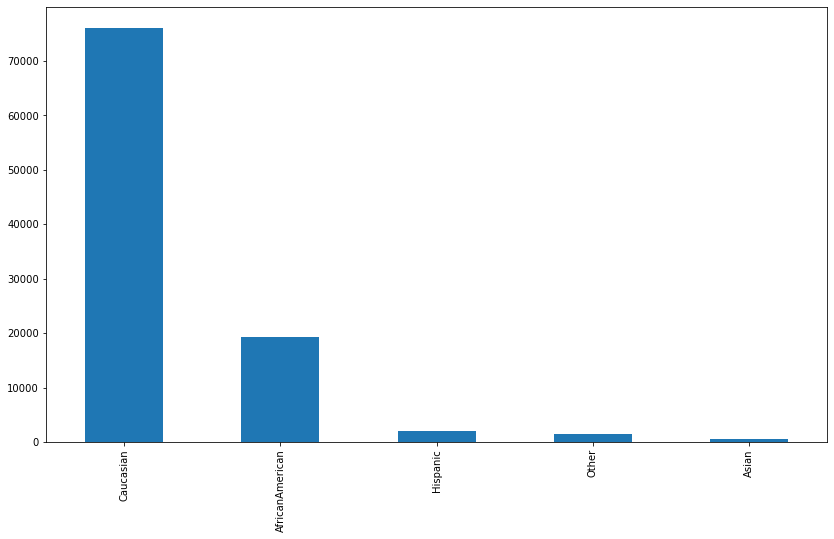

In [280]:
#We will look at is the race column. 
ax = dia_df['race'].value_counts().plot(kind='bar',figsize=(14,8))
#We will use the mode for the race column 
dia_df['race'] = dia_df['race'].fillna(dia_df['race'].mode()[0])

In [281]:
#Let's examine how many empty values we have in our dataset not that each question mark has now been replaced. 
dia_df.isna().sum()

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [282]:
#We will make diag_1, diag_2, and diag_3 numeric datatype
dia_df['diag_1'] = pd.to_numeric(dia_df['diag_1'])
dia_df['diag_2'] = pd.to_numeric(dia_df['diag_2'])
dia_df['diag_3'] = pd.to_numeric(dia_df['diag_3'])
dia_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   encounter_id              101766 non-null  int64  
 1   patient_nbr               101766 non-null  int64  
 2   race                      101766 non-null  object 
 3   gender                    101766 non-null  object 
 4   age                       101766 non-null  object 
 5   weight                    3197 non-null    object 
 6   admission_type_id         101766 non-null  int64  
 7   discharge_disposition_id  101766 non-null  int64  
 8   admission_source_id       101766 non-null  int64  
 9   time_in_hospital          101766 non-null  int64  
 10  payer_code                101766 non-null  object 
 11  medical_specialty         101766 non-null  object 
 12  num_lab_procedures        101766 non-null  int64  
 13  num_procedures            101766 non-null  i

C:\Users\THEDAW~1\AppData\Local\Temp/ipykernel_41932/407545130.py:7: UserWarning: Legend does not support <AxesSubplot:title={'center':'Distributions of Diagnosis'}, xlabel='diag_1', ylabel='Density'> instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend([fig1,fig2,fig3],['diag_1','diag_2','diag_3'])


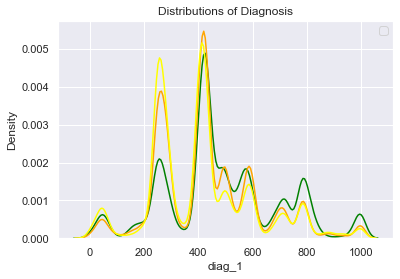

In [300]:
#Looking at the diagnosis and examining if they are normally distributed or not. 
sns.set(style='darkgrid')
fig1 = sns.kdeplot(dia_df['diag_1'], color='green')
fig2 = sns.kdeplot(dia_df['diag_2'], color='orange')
fig3 = sns.kdeplot(dia_df['diag_3'], color = 'yellow')
plt.title('Distributions of Diagnosis')
plt.legend([fig1,fig2,fig3],['diag_1','diag_2','diag_3'])
plt.show()

#For the diagnosis 1, 2 and 3 we will just compute the mean since we will invoke the central limit theorem for these values.
dia_df['diag_1'].fillna(int(dia_df['diag_1'].mean()),inplace=True)
dia_df['diag_2'].fillna(int(dia_df['diag_2'].mean()),inplace=True)
dia_df['diag_3'].fillna(int(dia_df['diag_3'].mean()),inplace=True)

In [288]:
#Re-examine how many empty values we have in our dataset all values are filled and none are missing. 
dia_df.isna().sum()

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [290]:
#We noticed that the weight feature has the most missing data, due to over 90% of the data being missing, we will remove this dataset. 
if 'weight' in dia_df:
    del dia_df['weight']
#examine the information of the dataset again. 
dia_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   encounter_id              101766 non-null  int64  
 1   patient_nbr               101766 non-null  int64  
 2   race                      101766 non-null  object 
 3   gender                    101766 non-null  object 
 4   age                       101766 non-null  object 
 5   admission_type_id         101766 non-null  int64  
 6   discharge_disposition_id  101766 non-null  int64  
 7   admission_source_id       101766 non-null  int64  
 8   time_in_hospital          101766 non-null  int64  
 9   payer_code                101766 non-null  object 
 10  medical_specialty         101766 non-null  object 
 11  num_lab_procedures        101766 non-null  int64  
 12  num_procedures            101766 non-null  int64  
 13  num_medications           101766 non-null  i

# Methods

In [291]:
#set the target y .. Then find the priors, % of being readmitted less than 30 days and greater than 30 days (grouping together) and no being opposite
#remove the target from big dataset. 

#use cross validation technique with the priors in mind. 
#Use logistic regression. 


# Results

In [302]:
# see results.. use evauluation metrics

# Conclusion

In [301]:
# write up conclusion